In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


sqkm = pd.read_excel('pop.xls', sheet_name='MYE', header=1, usecols='C:D, BI', 
                    skiprows=[2], nrows=33)

sqkm.rename(columns={'Area name': 'borough',
                    'Inner or Outer London': 'location',
                    'LAND AREA (Sq Km)': 'sqkm'},
           inplace=True)

# Convert borough variable to categorical type.
sqkm['borough'] = sqkm['borough'].astype('category')
# Convert location variable to lowercase categorical type.
sqkm['location'] = sqkm['location'].str.lower().astype('category')
# Assign both indicator variables to the index.
sqkm.set_index(['location', 'borough'], inplace=True)
sqkm.head(4)

sqkm
location borough                       
inner    City of London         2.89798
outer    Barking and Dagenham  36.08981
         Barnet                86.73733
         Bexley                60.55817

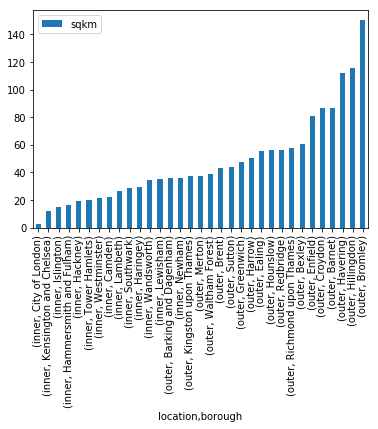

In [5]:
sqkm = sqkm.sort_values(by='sqkm')
sqkm.plot.bar()
plt.show()

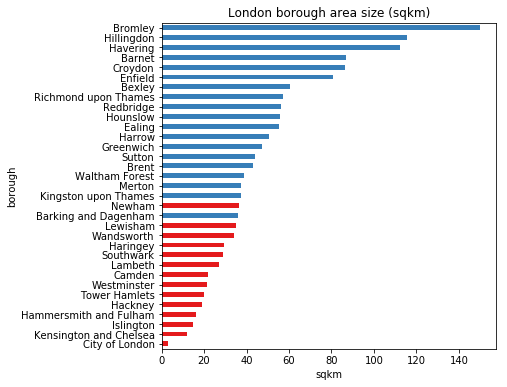

In [6]:
# Using a colormap, create an array of colours to
# show inner vs. outer borough.
cm = plt.get_cmap('Set1')
colours = [cm.colors[i] for i in
sqkm.index.get_level_values('location').codes]
# Create a new df with a single index (drop location).
boroughs = sqkm.reset_index(level='location', drop=True)
ax = boroughs['sqkm'].plot.barh(color=colours, figsize=(6, 6))
ax.set_title('London borough area size (sqkm)')
ax.set_xlabel('sqkm')
plt.show()

In [7]:
#Aggregate Location
totals = sqkm.groupby(level='location').sum()
totals

,sqkm
location,
inner,319.304380
outer,1252.774569


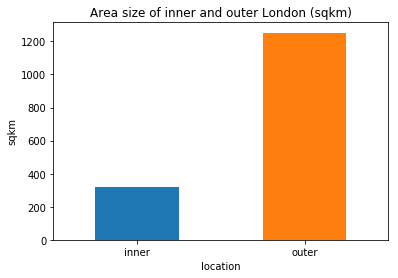

In [8]:
#Inner and outer london boroughs
ax = totals['sqkm'].plot.bar(rot=0)
ax.set_title('''Area size of inner and outer London (sqkm)''')
ax.set_ylabel('sqkm')
plt.show()



In [9]:
df = pd.read_excel('pop.xls', sheet_name='MYE', header=1, usecols='C:BG', 
                    skiprows=[2], nrows=33)

df.rename(columns={'Area name': 'borough',
                    'Inner or Outer London': 'location'},
           inplace=True)

df

,borough,location,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,Inner,5000,5000,4000,4000,4000,4000,4000,4000,...,7300,7600,7400.0,7500,7300,7400,7600,7600,8100,8760
1,Barking and Dagenham,Outer,176000,176000,174000,173000,170000,168000,167000,165000,...,167200,169000,172500.0,177600,182800,187000,190600,194400,198300,201979
2,Barnet,Outer,318000,318000,316000,315000,314000,315000,313000,310000,...,330800,334800,339200.0,345800,351400,357500,364000,369100,374900,379691
3,Bexley,Outer,210000,211000,212000,214000,215000,215000,215000,215000,...,223300,224600,226700.0,228100,230700,232800,234300,236700,239900,242142
4,Brent,Outer,295000,294000,294000,292000,291000,290000,289000,285000,...,276500,283300,290900.0,298100,304800,312200,314700,317300,320800,324012
5,Bromley,Outer,294000,296000,297000,299000,301000,302000,303000,304000,...,301000,302600,305000.0,306900,308600,310600,314000,317900,321300,324857
6,Camden,Inner,245000,244000,242000,239000,236000,234000,230000,226000,...,211000,211500,210300.0,212900,214700,220100,225000,229700,234800,241059
7,Croydon,Outer,325000,326000,326000,326000,326000,326000,327000,329000,...,340400,344000,349300.0,352800,358000,364800,368900,372800,376000,379031
8,Ealing,Outer,301000,302000,301000,302000,302000,302000,301000,302000,...,315300,318700,324000.0,330000,334100,339300,340700,342500,342100,343059
9,Enfield,Outer,272000,272000,272000,272000,272000,271000,271000,270000,...,287400,291500,297400.0,302000,307600,313900,317300,320500,324600,328433


In [10]:
# Convert borough variable to categorical.
df['borough'] = df['borough'].astype('category')
# Convert location variable to lowercase categorical.
df['location'] = df['location'].str.lower()
df['location'] = df['location'].astype('category')
df.iloc[:, 0:5].head(4)

,borough,location,1961,1962,1963
0,City of London,inner,5000,5000,4000
1,Barking and Dagenham,outer,176000,176000,174000
2,Barnet,outer,318000,318000,316000
3,Bexley,outer,210000,211000,212000


In [11]:
#Assign new variable for time series
ts = df.melt(id_vars=['borough', 'location'],
var_name='year', value_name='population')
ts.head()

,borough,location,year,population
0,City of London,inner,1961,5000.0
1,Barking and Dagenham,outer,1961,176000.0
2,Barnet,outer,1961,318000.0
3,Bexley,outer,1961,210000.0
4,Brent,outer,1961,295000.0


In [12]:
# Create a datetime series parsing the year strings.
# The data are mid-year estimates, so create timestampes
# to represent this.
ts['year'] = ts['year'].astype('str') +'/06/30'
ts['year'] = pd.to_datetime(ts['year'], format='%Y/%m/%d' )
# Assign the year column to the index, creating a DatetimeIndex.
ts.set_index('year', inplace=True)
# Conver the the DatetimeIndex to a PeriodIndex of day frequency.
ts = ts.to_period('D')
ts.head()

,borough,location,population
year,,,
1961-06-30,City of London,inner,5000.0
1961-06-30,Barking and Dagenham,outer,176000.0
1961-06-30,Barnet,outer,318000.0
1961-06-30,Bexley,outer,210000.0
1961-06-30,Brent,outer,295000.0


In [13]:
# Assign all indicator variables to the index.
ts.set_index(['location', 'borough'], inplace=True, append=True)
ts.sort_index(inplace=True)
ts.head()

population
year       location borough                           
1961-06-30 inner    Camden                    245000.0
                    City of London              5000.0
                    Hackney                   257000.0
                    Hammersmith and Fulham    221000.0
                    Haringey                  259000.0

In [14]:
ts.loc[('1961-06-30', 'inner')].head(5)

,population
borough,
Camden,245000.0
City of London,5000.0
Hackney,257000.0
Hammersmith and Fulham,221000.0
Haringey,259000.0


In [15]:
#Using slice
ts.loc[
    (
        slice(None), 
        slice(None), 
        'Westminster',
    ), 
    :
].head()

,,,population
year,location,borough,
1961-06-30,inner,Westminster,271000.0
1962-06-30,inner,Westminster,270000.0
1963-06-30,inner,Westminster,270000.0
1964-06-30,inner,Westminster,269000.0
1965-06-30,inner,Westminster,266000.0


In [16]:
ts.loc[
    (
        slice(None), 
        slice(None), 
        ['Camden', 'Lewisham'],
    ), 
    :
].head()

population
year       location borough             
1961-06-30 inner    Camden      245000.0
                    Lewisham    290000.0
1962-06-30 inner    Camden      244000.0
                    Lewisham    291000.0
1963-06-30 inner    Camden      242000.0

In [17]:
#Shows the index is now a day
ts.index

MultiIndex(levels=[[1961-06-30, 1962-06-30, 1963-06-30, 1964-06-30, 1965-06-30, 1966-06-30, 1967-06-30, 1968-06-30, 1969-06-30, 1970-06-30, 1971-06-30, 1972-06-30, 1973-06-30, 1974-06-30, 1975-06-30, 1976-06-30, 1977-06-30, 1978-06-30, 1979-06-30, 1980-06-30, 1981-06-30, 1982-06-30, 1983-06-30, 1984-06-30, 1985-06-30, 1986-06-30, 1987-06-30, 1988-06-30, 1989-06-30, 1990-06-30, 1991-06-30, 1992-06-30, 1993-06-30, 1994-06-30, 1995-06-30, 1996-06-30, 1997-06-30, 1998-06-30, 1999-06-30, 2000-06-30, 2001-06-30, 2002-06-30, 2003-06-30, 2004-06-30, 2005-06-30, 2006-06-30, 2007-06-30, 2008-06-30, 2009-06-30, 2010-06-30, 2011-06-30, 2012-06-30, 2013-06-30, 2014-06-30, 2015-06-30], ['inner', 'outer'], ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', '

In [18]:
#Cross section
ts.xs('Lewisham', level='borough').head()

,,population
year,location,
1961-06-30,inner,290000.0
1962-06-30,inner,291000.0
1963-06-30,inner,289000.0
1964-06-30,inner,288000.0
1965-06-30,inner,286000.0


In [19]:
ts.xs('inner', level='location').head()

population
year       borough                           
1961-06-30 Camden                    245000.0
           City of London              5000.0
           Hackney                   257000.0
           Hammersmith and Fulham    221000.0
           Haringey                  259000.0

In [20]:
# All inner boroughs in 1971.
ts.xs(['1971-06-30', 'inner'],
level=['year', 'location']).head()

,population
borough,
Camden,209300.0
City of London,4200.0
Hackney,223200.0
Hammersmith and Fulham,188800.0
Haringey,243400.0


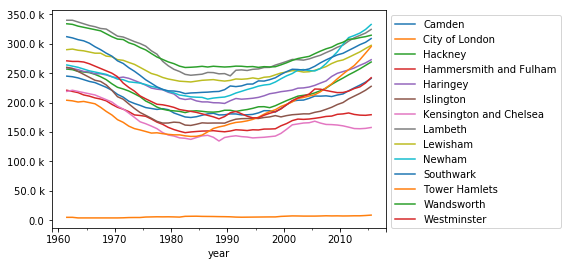

In [21]:
#plot inner boroughs
from matplotlib.ticker import EngFormatter
inner = ts.xs('inner', level='location').unstack()
ax = inner['population'].plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

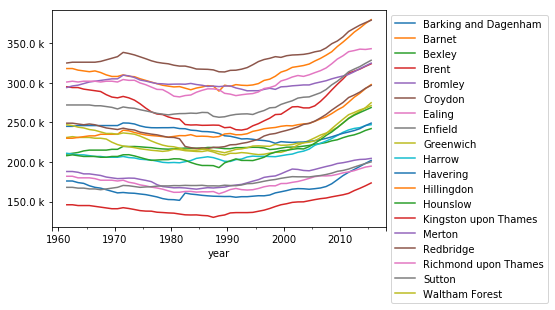

In [22]:
#Plot outer boroughs
from matplotlib.ticker import EngFormatter
outer = ts.xs('outer', level='location').unstack()
ax = outer['population'].plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [23]:
# Group by index levels year and location, and sum values.
in_out = ts.groupby(level=['year', 'location']).sum()
in_out.head()

population
year       location            
1961-06-30 inner      3481000.0
           outer      4496000.0
1962-06-30 inner      3470000.0
           outer      4500000.0
1963-06-30 inner      3438000.0

In [24]:
# Move location level out of row index to columns index.
# This creates a multi-index column index.
in_out = in_out.unstack()
in_out.head(3)

population           
location        inner      outer
year                            
1961-06-30  3481000.0  4496000.0
1962-06-30  3470000.0  4500000.0
1963-06-30  3438000.0  4488000.0

In [25]:
in_out = in_out['population']
in_out.head(3)

location,inner,outer
year,,
1961-06-30,3481000.0,4496000.0
1962-06-30,3470000.0,4500000.0
1963-06-30,3438000.0,4488000.0


In [26]:
in_out=in_out.unstack()
in_out.head()

location  year      
inner     1961-06-30    3481000.0
          1962-06-30    3470000.0
          1963-06-30    3438000.0
          1964-06-30    3409000.0
          1965-06-30    3376000.0
dtype: float64

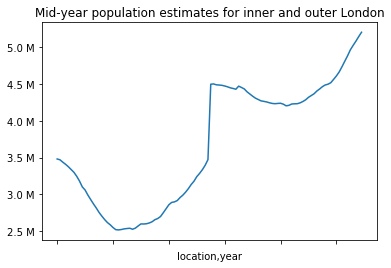

In [37]:
from matplotlib.ticker import EngFormatter
ax = in_out.plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('Mid-year population estimates for \
inner and outer London')
plt.show()

In [36]:
total = in_out[['inner', 'outer']].sum(axis=1)
total.name = 'total'
title = '''Mid-year population estimates for inner
and outer London, with total'''
ax = in_out.plot(title=title)
# Add total to same axes.
total.plot(ax=ax, legend=True)
ax.yaxis.set_major_formatter(EngFormatter(places=1))
plt.show()

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [30]:
difference = in_out['outer'] - in_out['inner']
difference.name = 'difference'
difference.head()

year
1961-06-30    1015000.0
1962-06-30    1030000.0
1963-06-30    1050000.0
1964-06-30    1076000.0
1965-06-30    1105000.0
Freq: D, Name: difference, dtype: float64

In [ ]:
# find the maximum difference value
difference.max()

In [ ]:
# Find the year in which the difference was biggest.
max_year = difference.idxmax()
max_year

In [ ]:
# Get the values for that year (2014).
in_out.loc[max_year]

In [ ]:
ax = in_out[['inner', 'outer']].plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('Mid-year population estimates for \
inner and outer London')
max_year = difference.idxmax()
outer_max = in_out.loc[max_year, 'outer']
inner_max = in_out.loc[max_year, 'inner']
# Add text label: shift one year to the left.
ax.text(max_year - 365,
(outer_max - inner_max) / 3 + inner_max,
'largest\ndifference\n in {}'.format(max_year.year),
horizontalalignment='right')
# Add arrow between inner and outer max.
ax.annotate('', xy=(max_year, outer_max),
xytext=(max_year, inner_max),
arrowprops=dict(
arrowstyle='<|-|>',
connectionstyle='arc3,rad=0.0',
edgecolor='black',
facecolor='black'))
ax.set_ylabel('population')
plt.show()

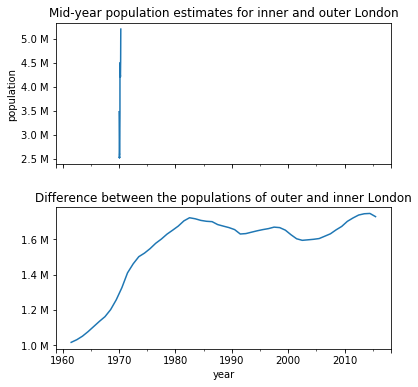

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
# Plot populations on top plot.
in_out[['inner', 'outer']].plot(ax=ax1)
ax1.yaxis.set_major_formatter(EngFormatter(places=1))
ax1.set_title('Mid-year population estimates for \
inner and outer London')
ax1.set_ylabel('population')
# Plot difference on bottom plot.
difference.plot(ax=ax2)
ax2.yaxis.set_major_formatter(EngFormatter(places=1))
ax2.set_title('Difference between the populations of \
outer and inner London')
fig.subplots_adjust(hspace=0.3)

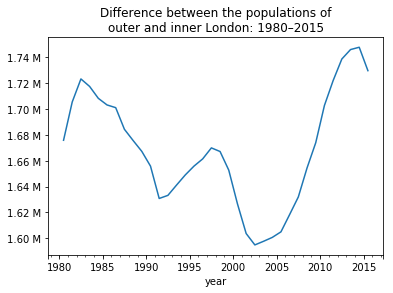

In [32]:
# slice data from 1980 to end (2015).
ax = difference.loc['1980':].plot()
ax.set_title('''Difference between the populations of
outer and inner London: 1980–2015''')
ax.yaxis.set_major_formatter(EngFormatter(places=2))

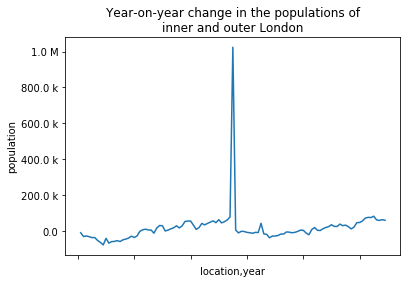

In [33]:
# The diff.() method calculates change between observations.
ax = in_out[['inner', 'outer']].diff().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Year-on-year change in the populations of
inner and outer London''')
ax.set_ylabel('population')
plt.show()

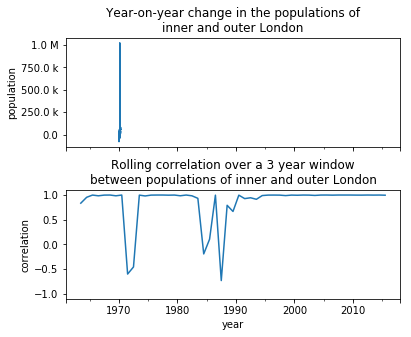

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4.8), sharex=True)
# Year-on-year change on top plot.
in_out[['inner', 'outer']].diff().plot(ax=ax1)
ax1.yaxis.set_major_formatter(EngFormatter(places=1))
ax1.set_title('''Year-on-year change in the populations of
inner and outer London''')
ax1.set_ylabel('population')
# Correlation on bottom plot.
# Create windowed correlation between inner and outer.
c = in_out['inner'].rolling(window=3).corr(in_out['outer'])
# Plot the relationship.
c.plot(ax=ax2)
# Adjust y axis range.
ax2.set_ylim(-1.1, 1.1)
ax2.set_title('''Rolling correlation over a 3 year window
between populations of inner and outer London''')
ax2.set_ylabel('correlation')
fig.subplots_adjust(hspace=0.4)

In [ ]:
# Create windowed correlation between inner and outer.
c = in_out['inner'].rolling(window=3).corr(in_out['outer'])
# Plot the relationship.
ax = c.plot()
# Adjust y axis range.
ax.set_ylim(-1.1, 1.1)
ax.set_title('''Rolling correlation over a 3 year window
between populations of inner and outer London''')
ax.set_ylabel('correlation')
plt.show()

In [ ]:
ax = pd.Series(np.random.rand(1000)).plot()
ax.set_title('Random data')
plt.show()

In [ ]:
from pandas.plotting import lag_plot
ax = lag_plot(pd.Series(np.random.rand(1000)))
ax.set_title('Lag plot of random data')
plt.show()

In [ ]:
from pandas.plotting import lag_plot
ax = lag_plot(in_out['inner'])
ax.set_title('Lag plot of inner London popultaion')
ax.xaxis.set_major_formatter(EngFormatter(places=1))
ax.yaxis.set_major_formatter(EngFormatter(places=1))
plt.show()

In [ ]:
#Testing for randomness: Autocorrelation plot
from pandas.plotting import autocorrelation_plot
ax = autocorrelation_plot(in_out['inner'])
ax.set_title('Autocorrelation plot of inner London \
population')
plt.show()